DATA SOURCE: 
https://www.kaggle.com/unsdsn/world-happiness

MEDIUM BLOG POST: 
https://medium.com/@nnoor_37077/what-i-learned-from-the-world-happiness-report-7e427ad6693d

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
happiness = pd.read_csv('2019.csv')
frame = pd.DataFrame(happiness)
frame.set_index('Overall rank', inplace = True)
frame.columns = ["Country", "Score", "GDP per Capita", "Social Support","Life Expectancy", "Freedom to Make Life Choices", "Generosity","Trust in Government"]
print(frame)


                               Country  Score  ...  Generosity  Trust in Government
Overall rank                                   ...                                 
1                              Finland  7.769  ...       0.153                0.393
2                              Denmark  7.600  ...       0.252                0.410
3                               Norway  7.554  ...       0.271                0.341
4                              Iceland  7.494  ...       0.354                0.118
5                          Netherlands  7.488  ...       0.322                0.298
...                                ...    ...  ...         ...                  ...
152                             Rwanda  3.334  ...       0.217                0.411
153                           Tanzania  3.231  ...       0.276                0.147
154                        Afghanistan  3.203  ...       0.158                0.025
155           Central African Republic  3.083  ...       0.235              

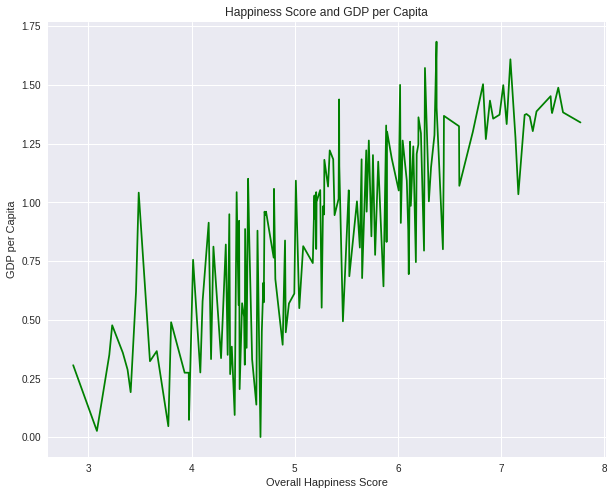

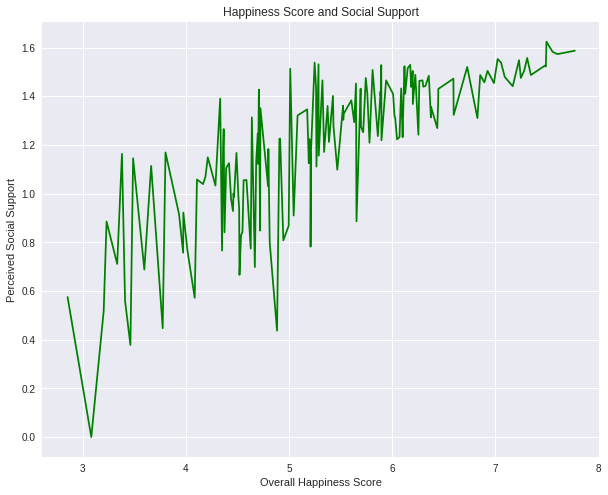

In [5]:
# Does money buy happiness? line plot
plt.style.use('seaborn')
plt.figure(figsize=(10,8))
plt.plot(frame['Score'], frame['GDP per Capita'], color='g')
plt.xlabel('Overall Happiness Score')
plt.ylabel('GDP per Capita')
plt.title('Happiness Score and GDP per Capita')
plt.show()

# Does social support buy happiness? line plot 
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.plot(frame['Score'], frame['Social Support'], color = 'g')
plt.xlabel('Overall Happiness Score')
plt.ylabel('Perceived Social Support')
plt.title('Happiness Score and Social Support')
plt.show()

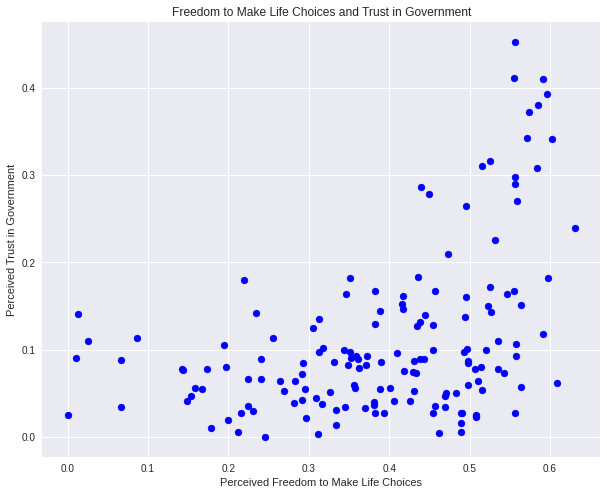

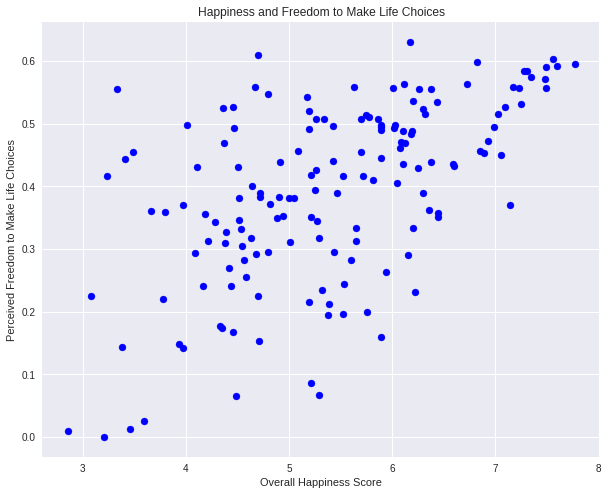

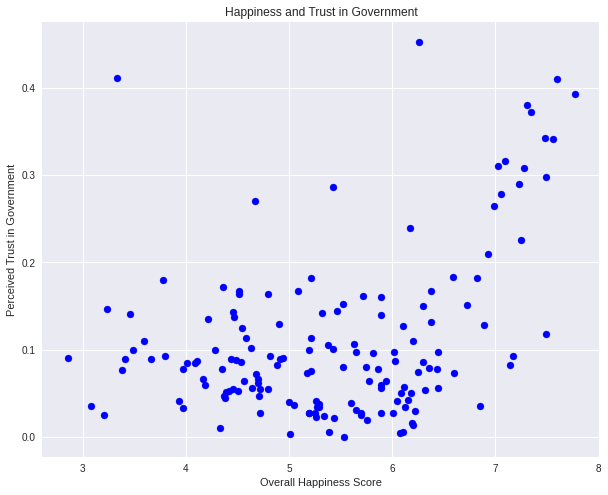

In [9]:
# How is freedom to make life choices and trust in government related? scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.scatter(frame['Freedom to Make Life Choices'], frame['Trust in Government'], color = 'b')
plt.xlabel('Perceived Freedom to Make Life Choices')
plt.ylabel('Perceived Trust in Government')
plt.title('Freedom to Make Life Choices and Trust in Government')
plt.show()

# How is happiness and freedom to make life choices related? scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.scatter(frame['Score'], frame['Freedom to Make Life Choices'], color = 'b')
plt.xlabel('Overall Happiness Score')
plt.ylabel('Perceived Freedom to Make Life Choices')
plt.title('Happiness and Freedom to Make Life Choices')
plt.show()

# How is happiness and trust in government related? scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.scatter(frame['Score'], frame['Trust in Government'], color = 'b')
plt.xlabel('Overall Happiness Score')
plt.ylabel('Perceived Trust in Government')
plt.title('Happiness and Trust in Government')
plt.show()

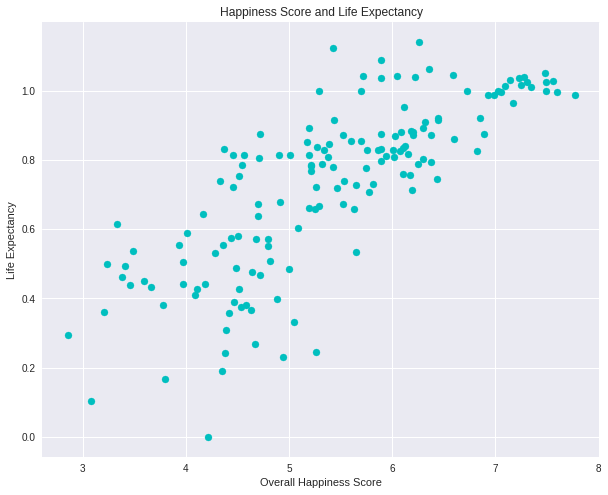

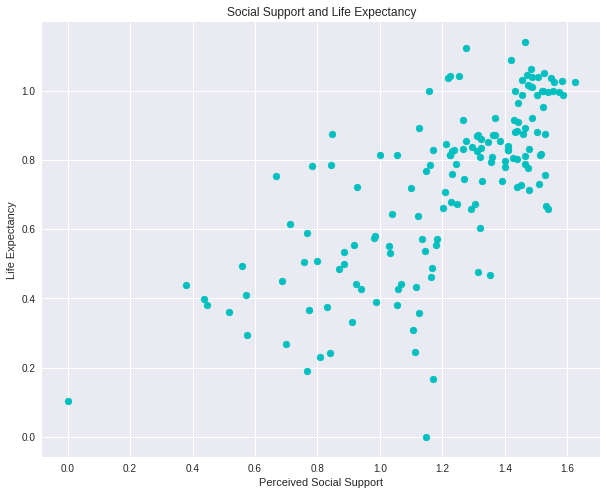

In [7]:
# How is happiness and life expectancy related? scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.scatter(frame['Score'], frame['Life Expectancy'], color = 'c')
plt.xlabel('Overall Happiness Score')
plt.ylabel('Life Expectancy')
plt.title('Happiness Score and Life Expectancy')
plt.show()

# How is happiness and social support related? scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.scatter(frame['Social Support'], frame['Life Expectancy'], color = 'c')
plt.xlabel('Perceived Social Support')
plt.ylabel('Life Expectancy')
plt.title('Social Support and Life Expectancy')
plt.show()

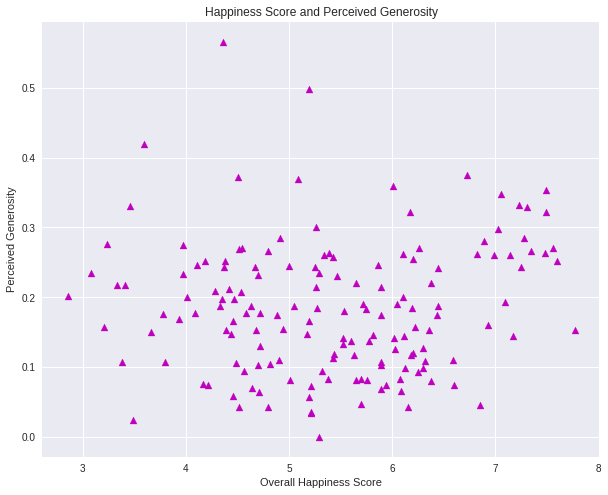

In [8]:
# How is generosity and happiness related? scatter plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
plt.scatter(frame['Score'], frame['Generosity'], color = 'm', marker= '^')
plt.xlabel('Overall Happiness Score')
plt.ylabel('Perceived Generosity')
plt.title('Happiness Score and Perceived Generosity')
plt.show()

5.407096153846154
                               Country  ...  Scores Above Average
Overall rank                            ...                      
1                              Finland  ...                  True
2                              Denmark  ...                  True
3                               Norway  ...                  True
4                              Iceland  ...                  True
5                          Netherlands  ...                  True
...                                ...  ...                   ...
152                             Rwanda  ...                 False
153                           Tanzania  ...                 False
154                        Afghanistan  ...                 False
155           Central African Republic  ...                 False
156                        South Sudan  ...                 False

[156 rows x 9 columns]
False    79
True     77
Name: Scores Above Average, dtype: int64
79
77


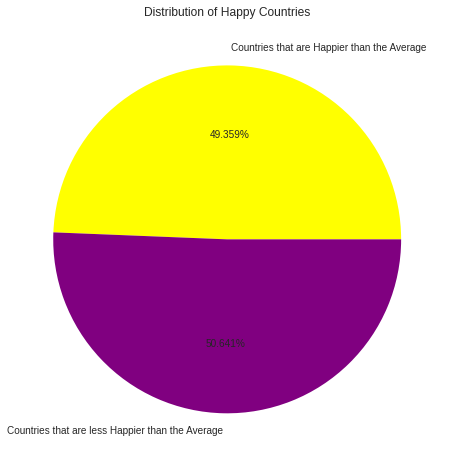

In [10]:
# How is happiness distributed? pie chart 

# Find averages of the happiness scores of all the countries
averageScore = frame['Score'].sum()/frame['Score'].count()
print(averageScore)

frame["Scores Above Average"] = frame["Score"] >= averageScore
print(frame)

scoresAboutAverage= frame['Scores Above Average'].value_counts()

print(scoresAboutAverage)

numCountriesBelowAvg= scoresAboutAverage[0]
numCountriesAboveAvg= scoresAboutAverage[1]

totalNumCountries = numCountriesAboveAvg + numCountriesBelowAvg

print(numCountriesBelowAvg)
print(numCountriesAboveAvg)

# Create the pir chart
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
sections = ['Countries that are Happier than the Average', 'Countries that are less Happier than the Average']
percentages = [numCountriesAboveAvg/totalNumCountries, numCountriesBelowAvg/totalNumCountries]
colors = ["yellow", "purple"]
plt.pie(percentages, labels=sections, colors = colors, autopct='%.3f%%')
plt.title('Distribution of Happy Countries')
plt.show()

              Country  Score  ...  Trust in Government  Scores Above Average
Overall rank                  ...                                           
1             Finland  7.769  ...                0.393                  True

[1 rows x 9 columns]
                  Country  Score  ...  Trust in Government  Scores Above Average
Overall rank                      ...                                           
156           South Sudan  2.853  ...                0.091                 False

[1 rows x 9 columns]


<function matplotlib.pyplot.show>

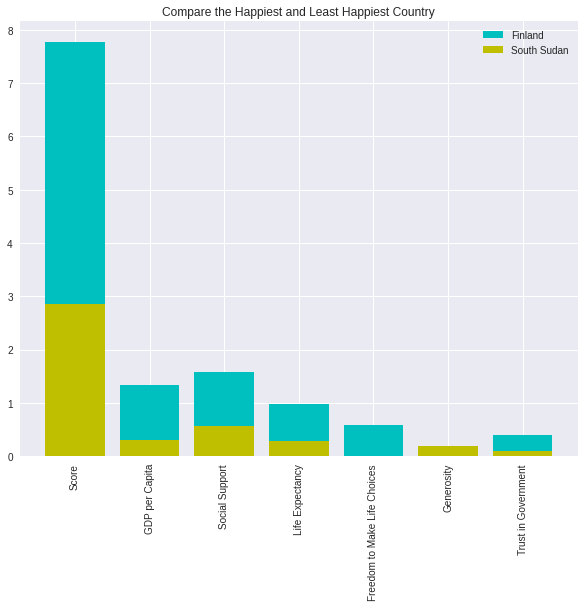

In [11]:
# Compare the scores of the top 1 and the bottom 1 countries

print(frame.head(1))
head = [7.769, 1.34,	1.587,	0.986,	0.596,	0.153,	0.393]
print(frame.tail(1))
tail = [2.853,	0.306,	0.575,	0.295,	0.01,	0.202,	0.091]

plt.style.use("seaborn")
plt.figure(figsize=(10, 8))
labels = ["Score", "GDP per Capita", "Social Support","Life Expectancy", "Freedom to Make Life Choices", "Generosity","Trust in Government"]
plt.bar(labels, head, label='Finland', color='c')
plt.bar(labels, tail, label='South Sudan', color='y')
plt.title('Compare the Happiest and Least Happiest Country')
plt.xticks(rotation=90)
plt.legend()
plt.show

              Country  Score  ...  Trust in Government  Scores Above Average
Overall rank                  ...                                           
4             Iceland  7.494  ...                0.118                  True

[1 rows x 9 columns]
                               Country  ...  Scores Above Average
Overall rank                            ...                      
155           Central African Republic  ...                 False

[1 rows x 9 columns]


<function matplotlib.pyplot.show>

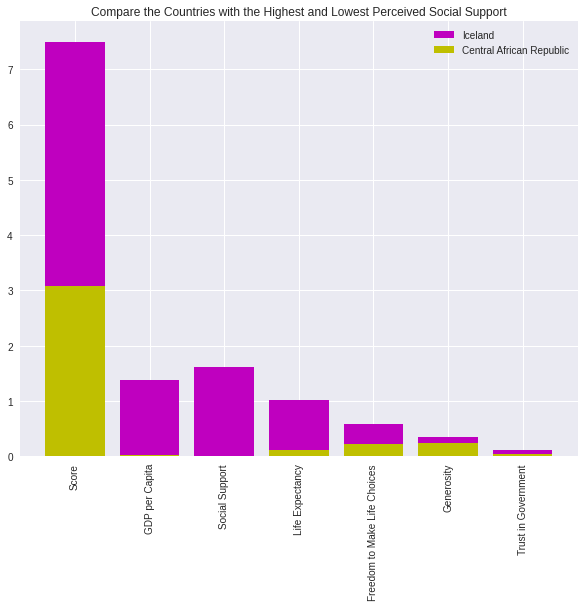

In [12]:
# Comparing the countries that feel the most social support with those that feel the least
newFrame = frame.sort_values(by='Social Support', ascending=False)
print(newFrame.head(1))
head = [7.494,	1.38,	1.624,	1.026,	0.591,	0.354,	0.118]
print(newFrame.tail(1))
tail = [3.083,	0.026,	0,	0.105,	0.225,	0.235,	0.035]

plt.style.use("seaborn")
plt.figure(figsize=(10, 8))
labels = ["Score", "GDP per Capita", "Social Support","Life Expectancy", "Freedom to Make Life Choices", "Generosity","Trust in Government"]
plt.bar(labels, head, label='Iceland', color='m')
plt.bar(labels, tail, label='Central African Republic', color='y')
plt.title('Compare the Countries with the Highest and Lowest Perceived Social Support')
plt.xticks(rotation=90)
plt.legend()
plt.show